#### Writing the assignment 6 again following the given instructions with different kinds of convolutions


1.   Normal Convolution
2.   Spatially Separable Convolution(Conv2D(x, (3, 1)) followed by Conv2D(x, (3, 1)))
3.   Depthwise Separable Convolution
4.   Grouped Convolution( use 3x3, 5x5 only)
5.   Grouped Convolution( use 3x3 only, one with dilation = 1, and another with dilation = 2)
6.   You must use all of the 5 above at least once
7.   Train this new model for 50 epochs
8.   Save File as Assignement 6B

But before that we will do all the preprocessing steps and after that during model defination we will add all those various convolutions

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import SeparableConv2D, concatenate
from keras.layers import Activation, Flatten, Dense, Dropout, Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols, img_channels =  train_features.shape
print("number of training examples = {}, image rows = {}, image columns = {} and image channels = {}".format(num_train, img_rows, img_cols, img_channels))
num_test, _, _, _ =  test_features.shape
print("number of test examples = {}".format(num_test))
num_classes = len(np.unique(train_labels))
print("total number of unique classes are {} = ".format(num_classes))

170500096/170498071 [==============================] - 11s 0us/step
number of training examples = 50000, image rows = 32, image columns = 32 and image channels = 3
number of test examples = 10000
total number of unique classes are 10 = 


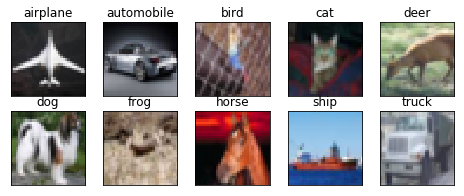

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
input_img = Input(shape=(32, 32, 3))

# Normal Convolution
tower_1 = Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005), input_shape=(32, 32, 3))(input_img) # 32
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = Dropout(0.2)(tower_1)

tower_1 = Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))(tower_1) # 32
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = Dropout(0.2)(tower_1)

tower_1 = MaxPooling2D(pool_size=(2, 2))(tower_1) # 16

# Spatially Separable Convolution(Conv2D(x, (3, 1)) followed by Conv2D(x, (3, 1)))
tower_2 = Convolution2D(64, 3, 1, border_mode='same', kernel_regularizer=l2(0.0005))(tower_1) # 16
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = Dropout(0.25)(tower_2)

tower_2 = Convolution2D(64, 1, 3, border_mode='same', kernel_regularizer=l2(0.0005))(tower_2) # 16
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = Dropout(0.25)(tower_2)

tower_2 = Convolution2D(64, 3, 1, border_mode='same', kernel_regularizer=l2(0.0005))(tower_2) # 16
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = Dropout(0.25)(tower_2)

tower_2 = Convolution2D(64, 1, 3, border_mode='same', kernel_regularizer=l2(0.0005))(tower_2) # 16
tower_2 = BatchNormalization()(tower_2)
tower_2 = Activation('relu')(tower_2)
tower_2 = Dropout(0.25)(tower_2)

tower_2 = MaxPooling2D(pool_size=(2, 2))(tower_2) # 8

# Depthwise Separable Convolution
tower_3 = SeparableConv2D(128, (3, 3), border_mode='same', depthwise_regularizer=l2(0.0005), pointwise_regularizer=l2(0.0005))(tower_2) # 8
tower_3 = BatchNormalization()(tower_3)
tower_3 = Activation('relu')(tower_3)
tower_3 = Dropout(0.25)(tower_3)

tower_3 = SeparableConv2D(128, (3, 3), border_mode='same', depthwise_regularizer=l2(0.0005), pointwise_regularizer=l2(0.0005))(tower_3) # 8
tower_3 = BatchNormalization()(tower_3)
tower_3 = Activation('relu')(tower_3)
tower_3 = Dropout(0.25)(tower_3)

# Grouped Convolution
tower_4_1 = Convolution2D(128, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))(tower_3) # 6
tower_4_1 = BatchNormalization()(tower_4_1)
tower_4_1 = Activation('relu')(tower_4_1)
tower_4_1 = Dropout(0.2)(tower_4_1)

tower_4_2 = Convolution2D(128, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))(tower_3) # 6
tower_4_2 = BatchNormalization()(tower_4_2)
tower_4_2 = Activation('relu')(tower_4_2)
tower_4_2 = Dropout(0.2)(tower_4_2)

tower_4 = concatenate([tower_4_1, tower_4_2])

# Grouped Convolution with dilation=2
tower_5_1 = Convolution2D(128, 3, 3, dilation_rate=2, kernel_regularizer=l2(0.0005))(tower_4) # 4
tower_5_1 = BatchNormalization()(tower_5_1)
tower_5_1 = Activation('relu')(tower_5_1)
tower_5_1 = Dropout(0.2)(tower_5_1)

tower_5_2 = Convolution2D(128, 3, 3, dilation_rate=2, kernel_regularizer=l2(0.0005))(tower_4) # 4
tower_5_2 = BatchNormalization()(tower_5_2)
tower_5_2 = Activation('relu')(tower_5_2)
tower_5_2 = Dropout(0.2)(tower_5_2)

tower_5 = concatenate([tower_5_1, tower_5_2])


tower_6 = Convolution2D(128, 1, 1, kernel_regularizer=l2(0.0005))(tower_5) # 4
tower_6 = BatchNormalization()(tower_6)
tower_6 = Activation('relu')(tower_6)
tower_6 = Dropout(0.25)(tower_6)

tower_6 = Convolution2D(64, 1, 1, kernel_regularizer=l2(0.0005))(tower_6) # 4
tower_6 = BatchNormalization()(tower_6)
tower_6 = Activation('relu')(tower_6)
tower_6 = Dropout(0.25)(tower_6)

tower_6 = Convolution2D(32, 1, 1, kernel_regularizer=l2(0.0005))(tower_6) # 4
tower_6 = BatchNormalization()(tower_6)
tower_6 = Activation('relu')(tower_6)
tower_6 = Dropout(0.25)(tower_6)


tower_7 = Convolution2D(10, 4, 4, kernel_regularizer=l2(0.0005))(tower_6) # 1
tower_7 = Activation('relu')(tower_7)

output = Flatten()(tower_7)
output = Activation('softmax')(output)

model = Model(inputs=input_img, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 3), kernel_regularizer=<keras.reg..., padding="same"



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 32)   128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), kernel_regularizer=<keras.reg...)`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
390/390 [==============================] - 55s 140ms/step - loss: 2.8347 - acc: 0.1830 - val_loss: 5.1379 - val_acc: 0.1020
Epoch 2/100
390/390 [==============================] - 46s 118ms/step - loss: 2.2790 - acc: 0.3621 - val_loss: 2.0857 - val_acc: 0.4082
Epoch 3/100
390/390 [==============================] - 46s 119ms/step - loss: 1.6205 - acc: 0.5602 - val_loss: 2.0975 - val_acc: 0.3800
Epoch 4/100
390/390 [==============================] - 46s 119ms/step - loss: 1.3598 - acc: 0.6371 - val_loss: 1.5031 - val_acc: 0.5731
Epoch 5/100
390/390 [==============================] - 46s 119ms/step - loss: 1.2151 - acc: 0.6798 - val_loss: 1.4547 - val_acc: 0.5738
Epoch 6/100
390/390 [==============================] - 46s 119ms/step - loss: 1.1294 - acc: 0.7096 - val_loss: 1.4453 - val_acc: 0.6014
Epoch 7/100
390/390 [==============================] - 46s 119ms/step - loss: 1.0776 - a

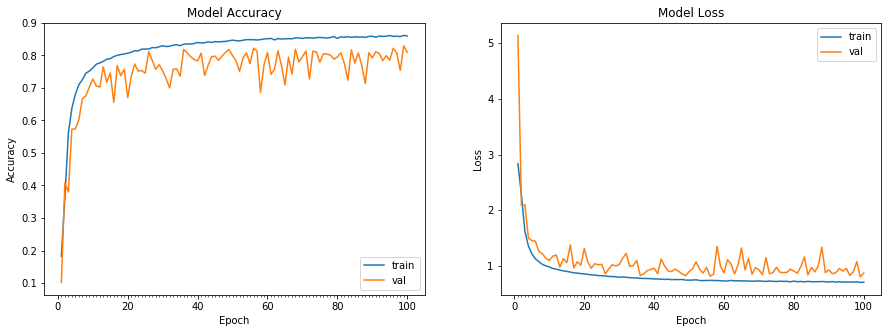

Accuracy on test data is: 80.92


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))